<a href="https://colab.research.google.com/github/shinyche1082/2022-1/blob/main/Week_14_Taipei_Rainfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rain on my Shoulder
---
To tackle climate change by analyzing Rain falling in Taiwan, Tao-Yuan. 

1. [政府資料開放平台](https://data.gov.tw/dataset/130309), 1960-2017年全臺各縣市雨量網格月平均資料

In [1]:
!pip install plotnine mizani numerize pandas
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install numba numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import numpy as np
import pandas as pd
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt

from mizani.formatters import date_format
from numerize import numerize

%matplotlib inline

In [6]:
# load data in code page 950
file="/content/ObsRain_臺北市.csv"
data = pd.read_csv(file, encoding="cp950")



In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16104 entries, 0 to 16103
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CityName    16104 non-null  object 
 1   YY          16104 non-null  int64  
 2   MM          16104 non-null  int64  
 3   WGS84_Lon   16104 non-null  float64
 4   WGS84_Lat   16104 non-null  float64
 5   RainValue   16104 non-null  float64
 6   Unnamed: 6  0 non-null      float64
dtypes: float64(4), int64(2), object(1)
memory usage: 880.8+ KB


In [9]:
data['DD']=1

data['Datetime'] = pd.to_datetime(data[['YY', 'MM', 'DD']].astype(str).apply('-'.join, axis=1), format='%Y-%m-%d')

data['RainValue'].fillna(0,inplace=True)
data['RainValue']=np.round(data['RainValue'].astype(float))
#data['RainValue']=data['RainValue'].astype(int)

data.index=data['Datetime']

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16104 entries, 0 to 16103
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   CityName    16104 non-null  object        
 1   YY          16104 non-null  int64         
 2   MM          16104 non-null  int64         
 3   WGS84_Lon   16104 non-null  float64       
 4   WGS84_Lat   16104 non-null  float64       
 5   RainValue   16104 non-null  float64       
 6   Unnamed: 6  0 non-null      float64       
 7   DD          16104 non-null  int64         
 8   Datetime    16104 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 1.1+ MB


In [11]:
data['RainValue'].fillna(0,inplace=True)
data['RainValue']=data['RainValue'].astype(int)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16104 entries, 0 to 16103
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   CityName    16104 non-null  object        
 1   YY          16104 non-null  int64         
 2   MM          16104 non-null  int64         
 3   WGS84_Lon   16104 non-null  float64       
 4   WGS84_Lat   16104 non-null  float64       
 5   RainValue   16104 non-null  int64         
 6   Unnamed: 6  0 non-null      float64       
 7   DD          16104 non-null  int64         
 8   Datetime    16104 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 1.1+ MB


In [13]:
data.tail()

,CityName,YY,MM,WGS84_Lon,WGS84_Lat,RainValue,Unnamed: 6,DD,Datetime
16099,臺北市,2020,8,121.65,25.1,8,NaN,1,2020-08-01
16100,臺北市,2020,9,121.65,25.1,12,NaN,1,2020-09-01
16101,臺北市,2020,10,121.65,25.1,13,NaN,1,2020-10-01
16102,臺北市,2020,11,121.65,25.1,8,NaN,1,2020-11-01
16103,臺北市,2020,12,121.65,25.1,26,NaN,1,2020-12-01


In [14]:
series_df=data[['Datetime','RainValue']]
series_df.head()

,Datetime,RainValue
0,1960-01-01,3
1,1960-02-01,0
2,1960-03-01,4
3,1960-04-01,7
4,1960-05-01,6


In [15]:
series_df.head()


,Datetime,RainValue
0,1960-01-01,3
1,1960-02-01,0
2,1960-03-01,4
3,1960-04-01,7
4,1960-05-01,6


In [16]:
!pip install -U numba numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


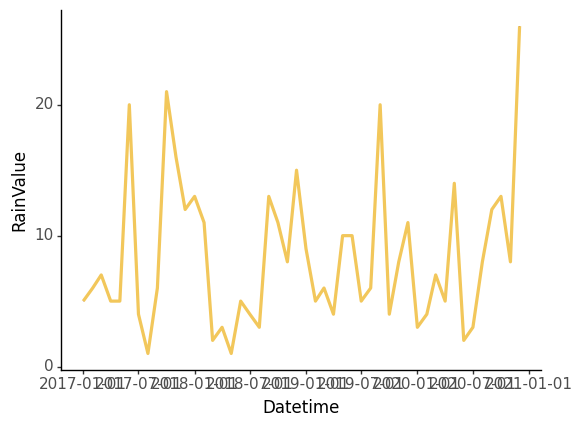

<ggplot: (8792435980292)>

In [17]:
rain_plot = ggplot(series_df[-48:]) + \
              aes(x='Datetime', y='RainValue') + \
              theme_classic(base_family='Palatino', base_size=12) + \
              theme(plot_margin=.125,
                    axis_text=element_text(size=11),
                    legend_title=element_blank(),
                    legend_position='top') + \
              geom_line(color='#541675') + \
              geom_line(mapping=aes(x='Datetime', y='RainValue'),
                        color='#f2c75b', size=1.3) 
rain_plot

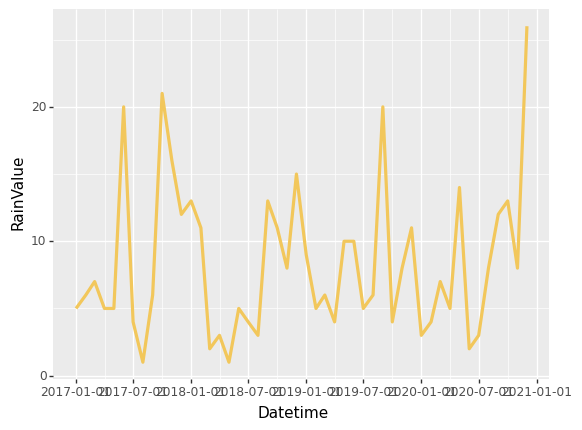

<ggplot: (8792435923923)>

In [18]:
ggplot(series_df[-48:]) + \
              aes(x='Datetime', y='RainValue') + \
              geom_line(mapping=aes(x='Datetime', y='RainValue'),
                        color='#f2c75b', size=1.3) 

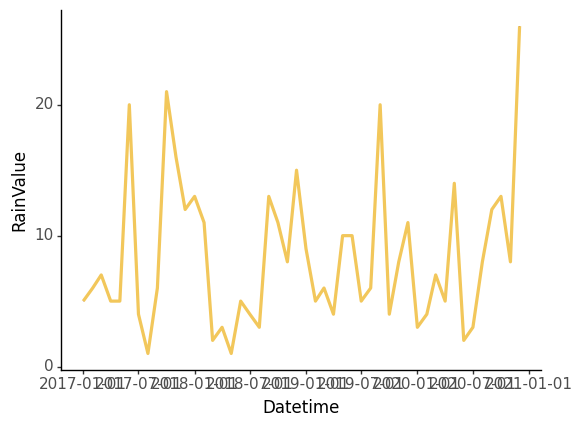

<ggplot: (8792435870405)>

In [19]:
rain_plot = ggplot(series_df[-48:]) + \
              aes(x='Datetime', y='RainValue') + \
              theme_classic(base_family='Palatino', base_size=12) + \
              theme(plot_margin=.125,
                    axis_text=element_text(size=11),
                    legend_title=element_blank(),
                    legend_position='top') + \
              geom_line(color='#541675') + \
              geom_line(mapping=aes(x='Datetime', y='RainValue'),
                        color='#f2c75b', size=1.3) 
rain_plot

In [20]:
# TIME SERIES PLOT
#theme_classic(base_family='Palatino', base_size=12) + \

rain_plot = ggplot(series_df[-48:]) + \
              aes(x='Datetime', y='RainValue') + \
              theme_classic(base_family='georgia', base_size=12) + \
              geom_line(mapping=aes(x='Datetime', y='RainValue'),
                        color='#f2c75b', size=1.3) + \
              xlab('Date Time') + \
              ylab('Rain Falling') + \
              theme(figure_size=(12, 6)) +\
              ggtitle('') + \
              scale_y_continuous(labels=lambda lst: [numerize.numerize(x)
                                  for x in lst])

In [21]:
series_df.index=series_df['Datetime']
series_df['Month'] = list(series_df.index.month_name())

<ipython-input-21-a9abd0ac9594>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [22]:
series_df.head()

,Datetime,RainValue,Month
Datetime,,,
1960-01-01,1960-01-01,3,January
1960-02-01,1960-02-01,0,February
1960-03-01,1960-03-01,4,March
1960-04-01,1960-04-01,7,April
1960-05-01,1960-05-01,6,May


In [23]:
# classify the feature into category
series_df['Month'] = pd.Categorical(series_df['Month'],
                                        categories=['January', 'February', 'March',
                                                    'April', 'May', 'June', 'July',
                                                    'August', 'September', 'October',
                                                    'November', 'December'])


<ipython-input-23-1f58456335aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


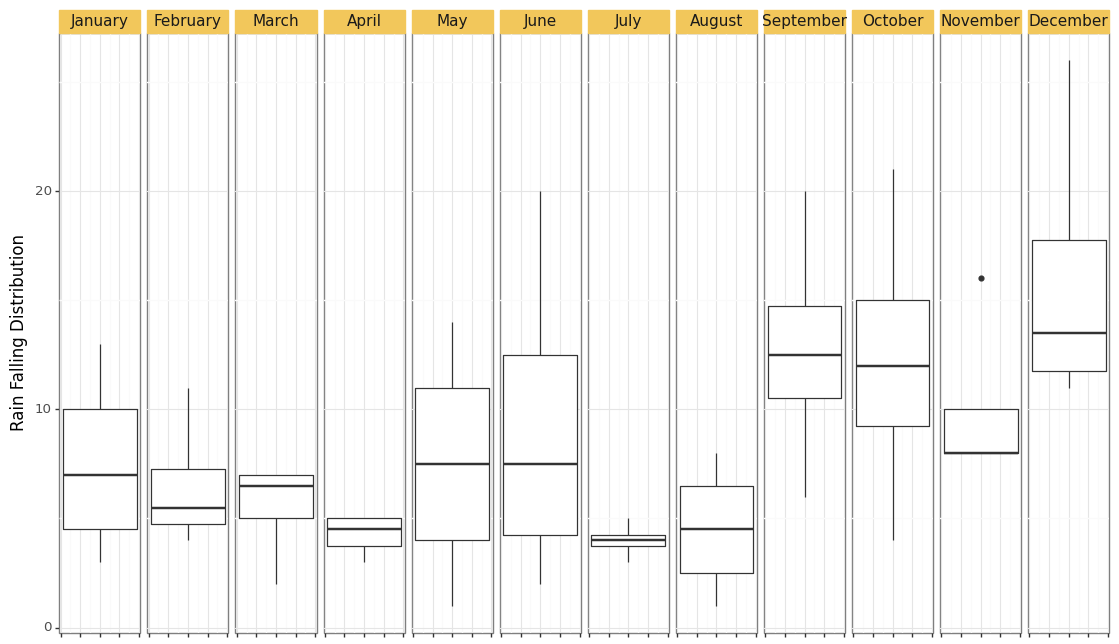

<ggplot: (8792433660598)>

In [24]:
# BOXPLOT ACROSS MONTH
monthly_distr_plot = \
    ggplot(series_df[-48:]) + \
    aes(x=0, y='RainValue') + \
    theme_bw(base_family='Georgia', base_size=12) + \
    theme(plot_margin=.125,
          axis_text_x=element_blank(),
          legend_title=element_blank(),
          strip_background_x=element_text(color='#f2c75b'),
          strip_text_x=element_text(size=11)) + \
    geom_boxplot() + \
    facet_grid('. ~Month') + \
    labs(x='', y='Rain Falling Distribution') + \
    theme(figure_size=(14, 8)) +\
    scale_y_continuous(labels=lambda lst: [numerize.numerize(x)
                                           for x in lst])
monthly_distr_plot

In [25]:
series_df.head()

,Datetime,RainValue,Month
Datetime,,,
1960-01-01,1960-01-01,3,January
1960-02-01,1960-02-01,0,February
1960-03-01,1960-03-01,4,March
1960-04-01,1960-04-01,7,April
1960-05-01,1960-05-01,6,May


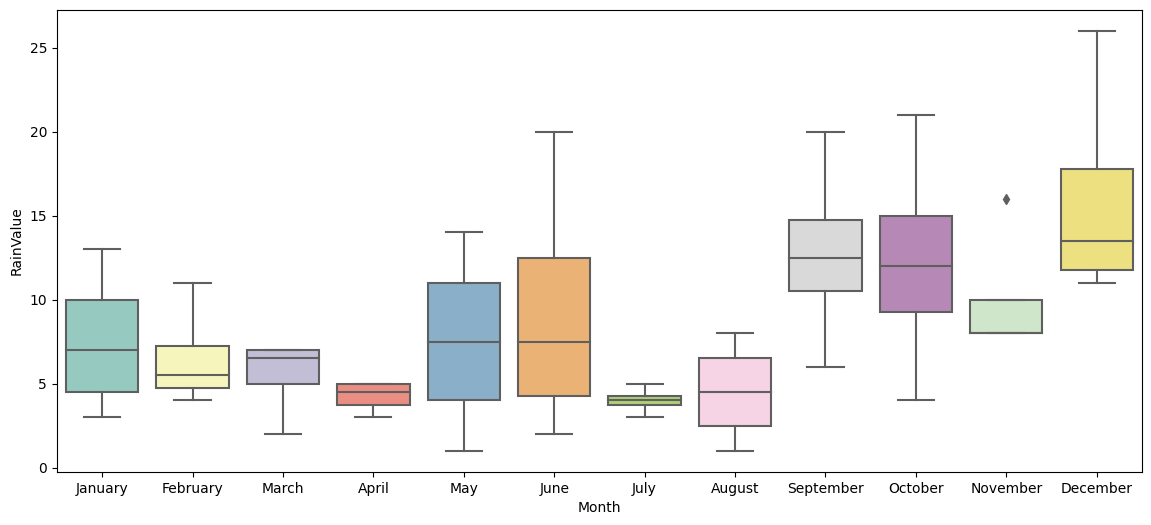

In [26]:
plt.figure(figsize=(14,6))
sns.boxplot(x="Month",y="RainValue",data=series_df[-48:],palette="Set3");


In [27]:
# SEASONAL SUB-SERIES PLOT
stat_by_group = series_df[-48:].groupby('Month')['RainValue'].mean()
stat_by_group = stat_by_group.reset_index()

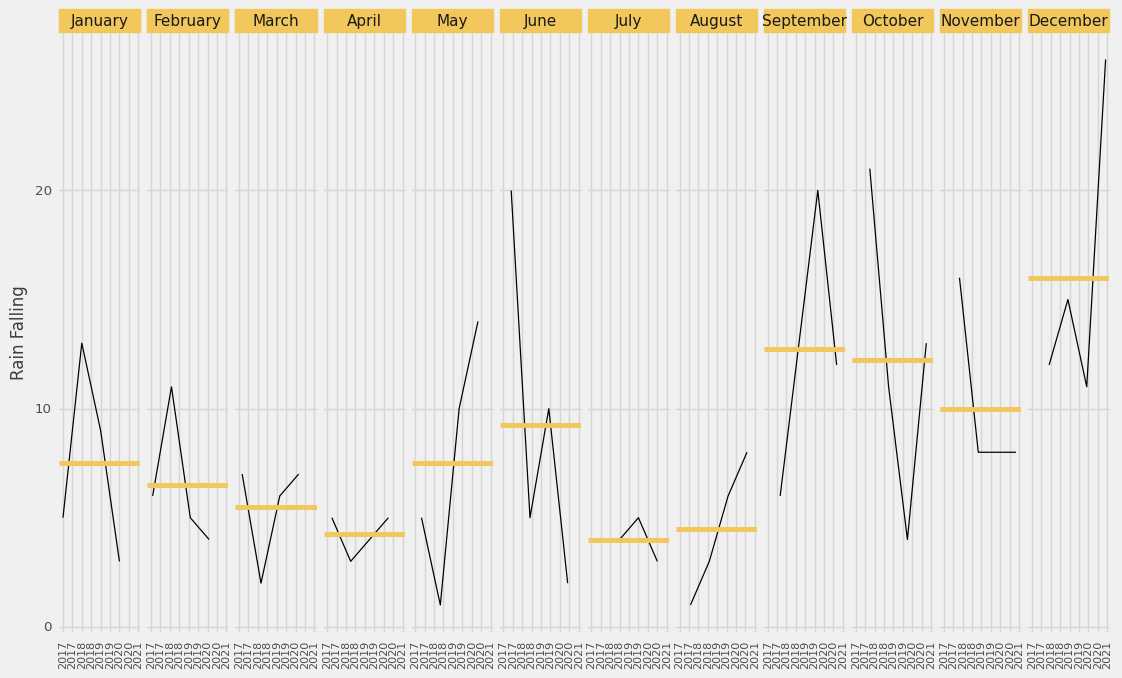

<ggplot: (8792432490833)>

In [28]:
seasonal_subseries_plot = \
    ggplot(series_df[-48:]) + \
    aes(x='Datetime',
        y='RainValue') + \
    theme_538(base_family='Georgia', base_size=12) + \
    theme(plot_margin=.125,
          axis_text_x=element_text(size=8, angle=90),
          legend_title=element_blank(),
          strip_background_x=element_text(color='#f2c75b'),
          strip_text_x=element_text(size=11)) + \
    geom_line() + \
    facet_grid('. ~Month') + \
    geom_hline(data=stat_by_group,
               mapping=aes(yintercept='RainValue'),
               colour='#f2c75b',
               size=2) + \
    theme(figure_size=(14, 8)) +\
    labs(x='', y='Rain Falling') + \
    scale_x_datetime(labels=date_format('%Y'))
seasonal_subseries_plot


In [29]:
series_df['MonthN']=series_df['Month'].astype("str")

<ipython-input-29-fcaebd88e0fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [30]:
series_df['Year']=series_df['Datetime'].dt.year

<ipython-input-30-54e781562484>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<Figure size 1400x600 with 0 Axes>

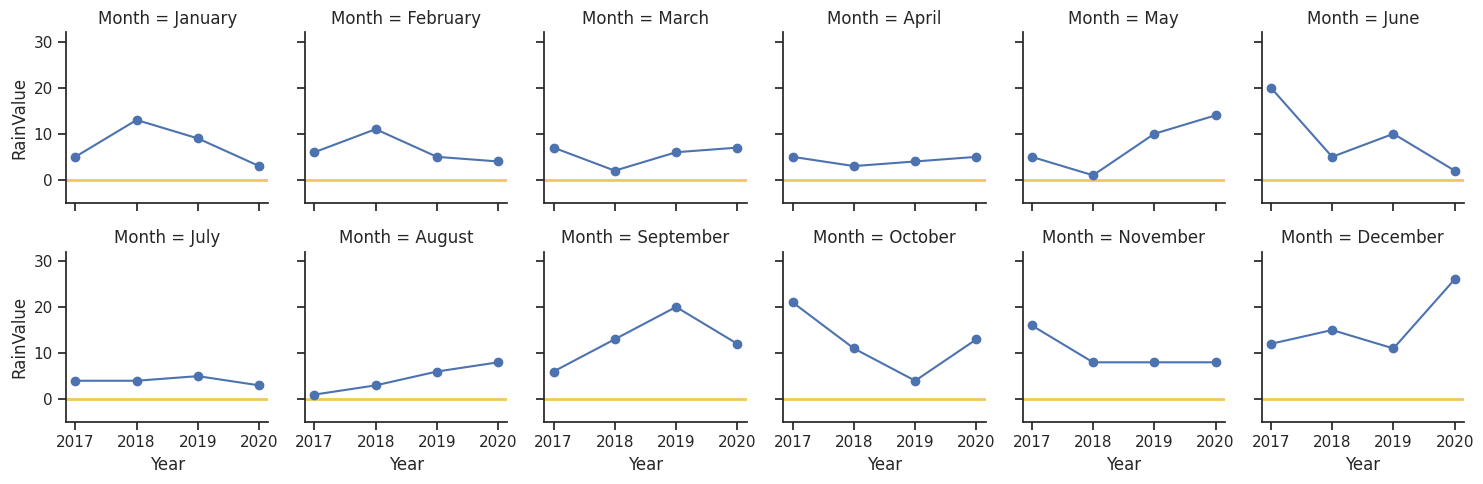

In [31]:
df=series_df[['RainValue','Month','Year']]

plt.figure(figsize=(14,6))
sns.set_theme(style="ticks")
grid=sns.FacetGrid(df[-48:], col="Month",  palette="tab20c",
                     col_wrap=6, height=2.5)
# Draw a horizontal line to show the starting point
grid.refline(y=0, linestyle="-",color='#f2c75b',linewidth=2)

grid.map(plt.plot, "Year", "RainValue", marker="o")
# Adjust the tick positions and labels

grid.set( ylim=(-5, 32))
# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

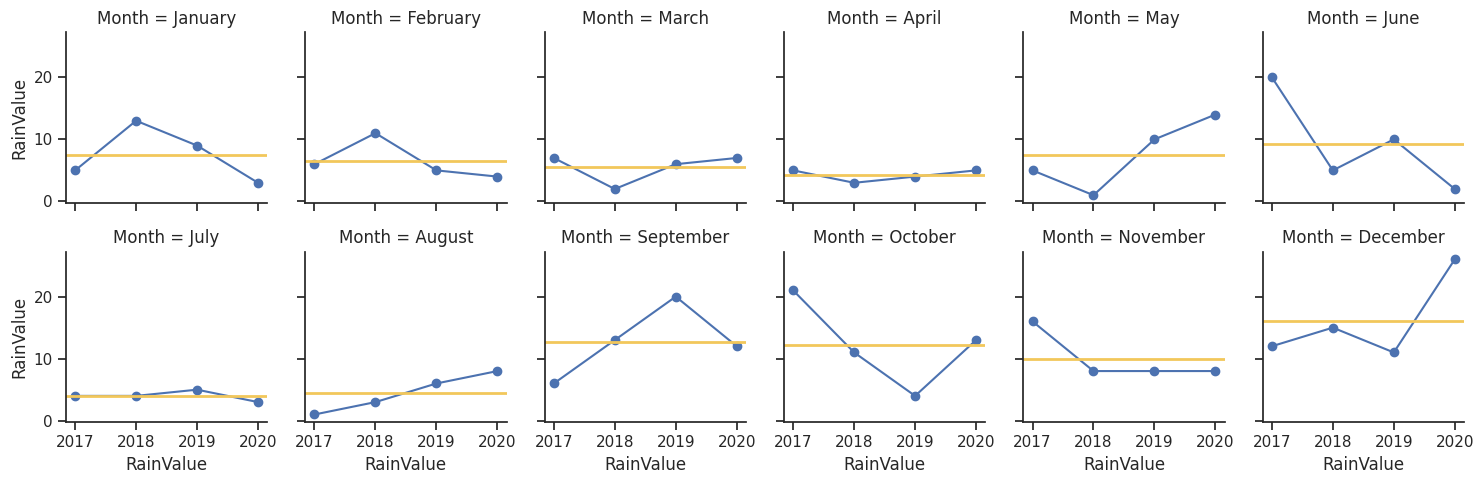

In [32]:
grid=sns.FacetGrid(df[-48:], col="Month",  palette="tab20c",
                     col_wrap=6, height=2.5)
grid.map(plt.plot, "Year", "RainValue", marker="o")

# create mean hline for each grid
grid = grid.map(lambda y, **kw: plt.axhline(y.mean(), color='#f2c75b',linewidth=2), 'RainValue')
